In [1]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pdb
from Patch_ana import patch_pip
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
plt.style.use('classic')

% matplotlib inline
%load_ext autoreload
% autoreload

In [2]:
data= pd.read_csv('/data/Good data storage.csv')
data.head()

,File name,Age,Pip number,E-I,Reci,Artifact,IS100,Trial number before,Trial number after,Protocol,Elimi,Notes,Ptl_note
0,2016072704,27,3,0,0,0,1,"26,27,28,29","34,35",1,0,NaN,50Hz IE preonly
1,2017021501,30,3,0,0,0,2,"12,13","16,17",1,0,NaN,50Hz IE preonly
2,2016091403,30,2,0,0,0,1,"14,15",18,1,1,NaN,50Hz IE preonly
3,2017062202,24,1,0,0,0,1,"30,31,32",35,1,0,"No change, good data",50Hz IE preonly
4,2016072902,29,1,0,1,0,0,43,"45,46,47,48,49",1,0,NaN,50Hz IE preonly


In [3]:
data_napsm = data[(data['Ptl_note']=='Pre_50Hz_naspm_low_con')]

In [4]:
data_napsm

,File name,Age,Pip number,E-I,Reci,Artifact,IS100,Trial number before,Trial number after,Protocol,Elimi,Notes,Ptl_note
189,2018060501,29,2,1,1,0,1,"45,46,46","48,49,50,51,52,53",25,0,NO change,Pre_50Hz_naspm_low_con
190,2018060502,29,2,1,1,0,1,"13,14,15","18,19,20,21,22",25,0,"NO change, low quality",Pre_50Hz_naspm_low_con
191,2018060601,23,2,1,1,0,1,"8,9","13,14,15,16",25,0,"NO change, low quality",Pre_50Hz_naspm_low_con
192,2018060602,23,2,1,1,0,1,29,"31,32,33,34",25,0,Weak LTD,Pre_50Hz_naspm_low_con
193,2018060603,23,2,1,1,0,1,"13,14","14,15,15,15,17",25,0,Weak LTD,Pre_50Hz_naspm_low_con
194,2017092802,29,1,1,1,0,1,"13,14,15,16,17,18,19","21,21",25,0,No change,Pre_50Hz_naspm_low_con


<Container object of 3 artists>

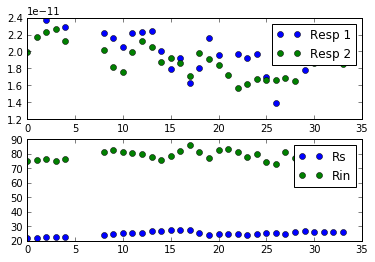

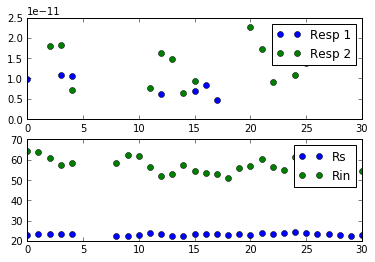

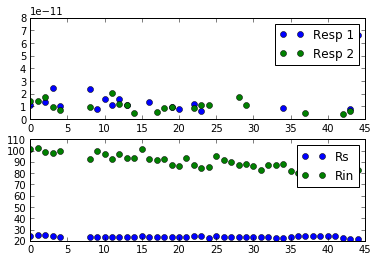

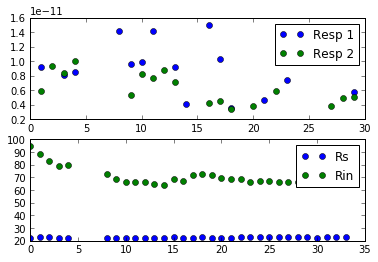

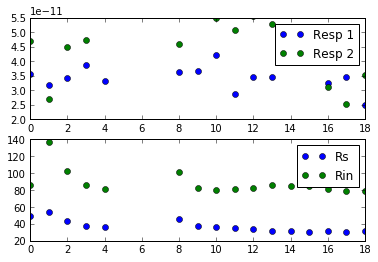

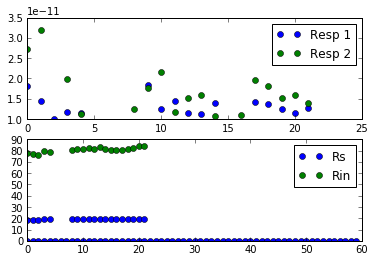

In [5]:
# patch_pip.df_ana(data_napsm,'/data/data_pre_naspm_reci', end_ana=[24,15,23,17,17,21])
patch_pip.df_ana(data_napsm,'/data/data_pre_naspm_reci_low_con')
data_pre_naspm_reci = pd.read_pickle('/data/data_pre_naspm_reci_low_con')
ave_ptl_mean, ave_ptl_ste = patch_pip.sample_plot(data_pre_naspm_reci)
plt.errorbar(x=np.arange(len(ave_ptl_mean)), y=ave_ptl_mean, yerr=ave_ptl_ste, fmt='bo')

In [6]:
data_pre_naspm_reci['Before'].index

Int64Index([189, 190, 191, 192, 193, 194], dtype='int64')

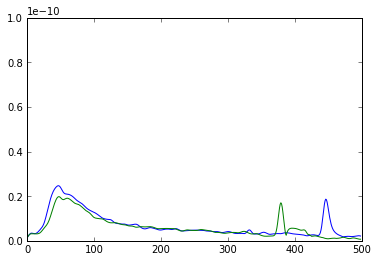

In [7]:
sample_id = 189
plt.plot(np.nanmean(np.vstack(data_pre_naspm_reci['Before'].loc[sample_id]['trace_y1'])[:, :500], axis=0))
plt.plot(np.nanmean(np.vstack(data_pre_naspm_reci['After'].loc[sample_id]['trace_y1'])[-5:,:500], axis=0))
plt.ylim([0, 1e-10])
with PdfPages('/data/Figure2_7.pdf') as pdf:
    pdf.savefig()

<Container object of 3 artists>

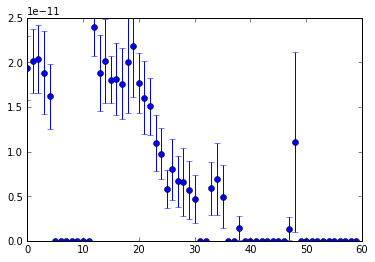

In [8]:
plt.errorbar(x=np.arange(len(ave_ptl_mean)), y=ave_ptl_mean, yerr=ave_ptl_ste, fmt='bo')

In [9]:
elimi = np.array([24,15,23,17,17,21])
elimi_sr = pd.Series(elimi, index=data_napsm.index)
data_pre_naspm_reci['elimi']=elimi_sr

In [10]:
# spon_elimi_aft = {}
# spon_elimi_aft[189] = [20,22,23,24,25,26,27,28,29,30,31,32,33,36,37,38,39,40,41,46,47,48]   # 66 126
# spon_elimi_aft[190] = [1,2,3,4,5,6,7,8,9,10,11,12,17,18,19,20,21]  # 36 96
# spon_elimi_aft[191] = [16,20,21,25,26,30,32,35,39,40,44]  # 66 126
# spon_elimi_aft[192] = [1,12,17,22,29]  # 66 126
# spon_elimi_aft[193] = [] # 36 96
# spon_elimi_aft[194] = [9,10,14,15,16,17,18,19,24,25,29,30,31,32,33,37,38,39] # 66 126
# spon_elimi_bef = {}
# spon_elimi_bef[189] = [5,6,7,8,9,10,11,12,13,14,15,16,17,18,25,26,27,28,29,30,31,32,33,34,35,36,37,38]   # 66 126
# spon_elimi_bef[190] = [0,1,2,3,4,5,6,7,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28]  # 36 96
# spon_elimi_bef[191] = [2,3,7,11,12,16,17,21,22,26,31]  # 66 126
# spon_elimi_bef[192] = [16,17,19]  # 66 126
# spon_elimi_bef[193] = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18] # 36 96
# spon_elimi_bef[194] = [3,4,5,6,7,8,9,10,14,15,16,17,18,19,23,24,25,26,27,28,29,34,35,36,37,28,39] # 66 126

In [11]:
spon_elimi_aft = {}
spon_elimi_aft[189] = [30,31,32,33,36,37,38,39,40,41,46,47,48]   # 66 126
spon_elimi_aft[190] = [1,2,3,4,5,6,7,8,9,10,11,12,17,18,19,20,21]  # 36 96
spon_elimi_aft[191] = [16,20,21,25,26,30,32,35,39,40,44]  # 66 126
spon_elimi_aft[192] = [1,12,17,22]  # 66 126
spon_elimi_aft[193] = [0] # 36 96
spon_elimi_aft[194] = [9,10,14,15,16,17,18,19,24,25,29,30,31,32,33,37,38,39] # 66 126
spon_elimi_bef = {}
spon_elimi_bef[189] = [5,6,7,8,9,10,11,12,13,14,15,16,17,18,25,26,27,28,29,30,31,32,33,34,35,36,37,38]   # 66 126
spon_elimi_bef[190] = [0,1,2,3,4,5,6,7,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28]  # 36 96
spon_elimi_bef[191] = [2,3,7,11,12,16,17,21,22,26,31]  # 66 126
spon_elimi_bef[192] = [16,17,19]  # 66 126
spon_elimi_bef[193] = [0] # 36 96
spon_elimi_bef[194] = [3,4,5,6,7,8,9,10,14,15,16,17,18,19,23,24,25,26,27,28,29,34,35,36,37,28,39] # 66 126

In [12]:
data_pre_naspm_reci['spon_elimi_bef'] = pd.Series(spon_elimi_bef, index=data_pre_naspm_reci.index)
data_pre_naspm_reci['spon_elimi_aft'] = pd.Series(spon_elimi_aft, index=data_pre_naspm_reci.index)

In [13]:
data_pre_naspm_reci.to_pickle('/data/ana_naspm_low_con')